In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [75]:
df=pd.read_csv("eng_college.csv")
df = df.rename(columns={'Ranking': 'Teaching'})

In [76]:
df.head()

,College,Teaching,Training Quality,Fees,Placement,Internship Quality,Infrastructure
0,College_1,5,2,4,5,5,2
1,College_2,2,2,1,1,2,4
2,College_3,4,4,3,1,1,1
3,College_4,4,3,1,2,4,3
4,College_5,3,1,1,5,2,3


In [77]:
df.shape

(1000, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   College             1000 non-null   object
 1   Teaching            1000 non-null   int64 
 2   Training Quality    1000 non-null   int64 
 3   Fees                1000 non-null   int64 
 4   Placement           1000 non-null   int64 
 5   Internship Quality  1000 non-null   int64 
 6   Infrastructure      1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [79]:
df.describe()

,Teaching,Training Quality,Fees,Placement,Internship Quality,Infrastructure
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,3.011000,2.92700,2.94700,3.009000,3.006000,2.977000
std,1.432806,1.42327,1.39504,1.393147,1.433185,1.427063
min,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000
25%,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000
50%,3.000000,3.00000,3.00000,3.000000,3.000000,3.000000
75%,4.000000,4.00000,4.00000,4.000000,4.000000,4.000000
max,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000


In [80]:
df.isnull().sum()

College               0
Teaching              0
Training Quality      0
Fees                  0
Placement             0
Internship Quality    0
Infrastructure        0
dtype: int64

In [81]:
df.duplicated().sum()

0

In [82]:
#The data looks clean and great we look for visualization

# Data visualization

<Axes: xlabel='Teaching', ylabel='count'>

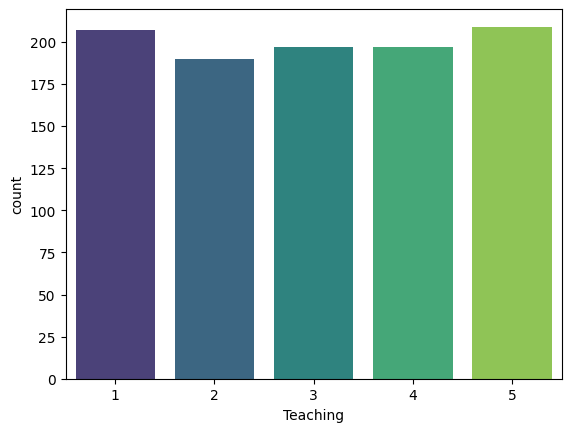

In [89]:
sns.countplot(data=df, x='Teaching', palette='viridis')

<Axes: xlabel='Training Quality', ylabel='count'>

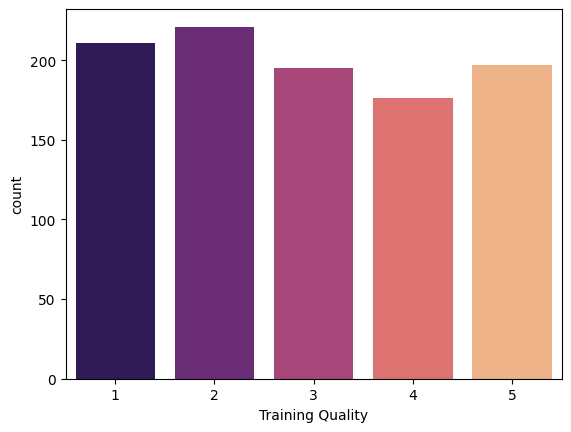

In [84]:
sns.countplot(data=df, x='Training Quality', palette='magma')

<Axes: xlabel='Fees', ylabel='count'>

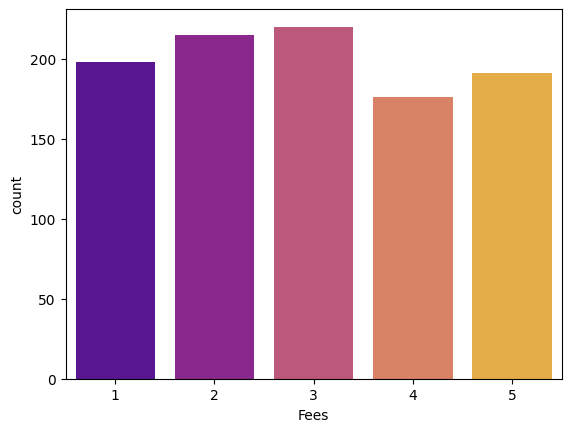

In [85]:
sns.countplot(data=df, x='Fees', palette='plasma')

<Axes: xlabel='Placement', ylabel='count'>

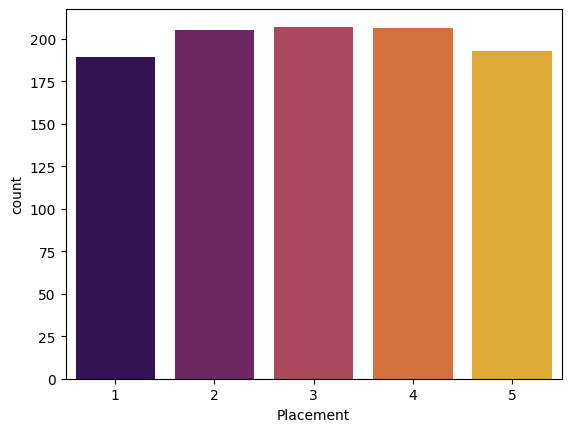

In [86]:
sns.countplot(data=df, x='Placement', palette='inferno')

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [92]:
link_method=linkage(df.iloc[:,1:6],method='complete')
link_method

array([[   0.        ,  106.        ,    0.        ,    2.        ],
       [   2.        ,  418.        ,    0.        ,    2.        ],
       [ 567.        ,  609.        ,    0.        ,    2.        ],
       ...,
       [1992.        , 1995.        ,    8.24621125,  427.        ],
       [1993.        , 1994.        ,    8.54400375,  573.        ],
       [1996.        , 1997.        ,    8.94427191, 1000.        ]])

In [93]:
labelist=np.array(df.College)

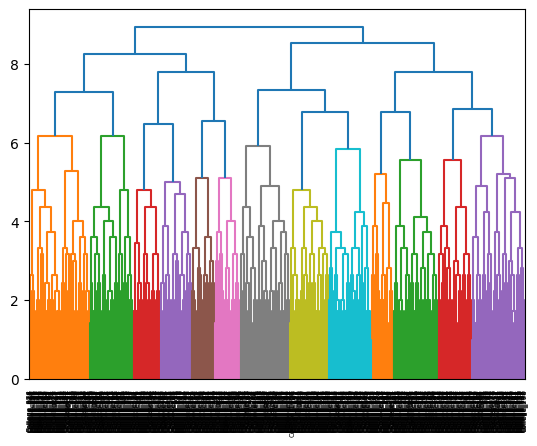

In [94]:
dend=dendrogram(link_method,labels=labellist)

# Cutting the dendogram

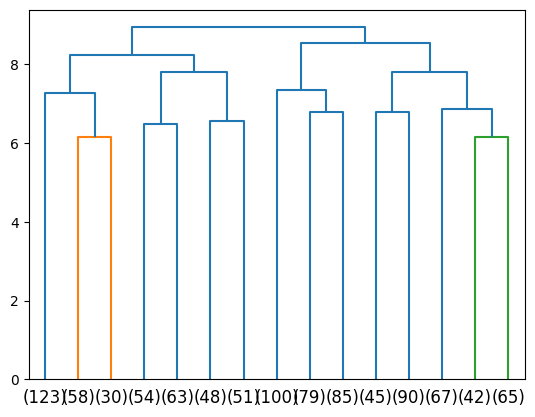

In [95]:
dend=dendrogram(link_method,
               truncate_mode='lastp',
               p=15,
               labels=labellist)

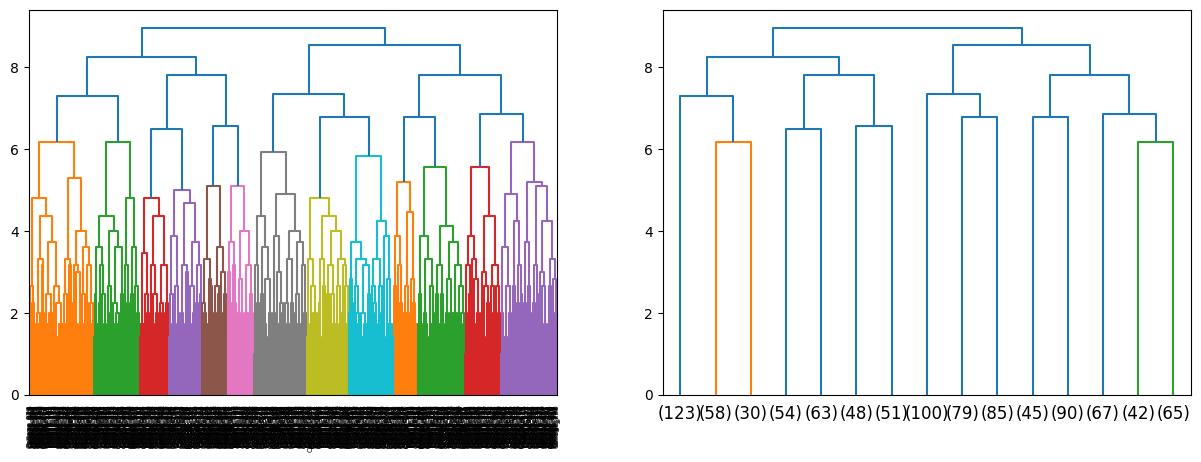

In [96]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
dend1=dendrogram(link_method,labels=labellist)
plt.subplot(1,2,2)
dend2=dendrogram(link_method,truncate_mode='lastp',p=15,labels=labelist)
plt.show()

In [97]:
from scipy.cluster.hierarchy import fcluster

In [98]:
cluster=fcluster(link_method,3,criterion="maxclust")

In [99]:
cluster

array([3, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 2, 3, 3, 1, 3, 3, 1, 1, 3, 2,
       1, 1, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1,
       2, 1, 3, 2, 3, 1, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 3, 1, 1,
       2, 1, 1, 1, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       3, 1, 1, 3, 1, 1, 3, 1, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 3, 2, 3,
       2, 2, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 1, 1, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 2, 3, 2, 2, 1, 3, 2, 3,
       3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 2, 3, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 2, 1,
       2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 3, 1, 2, 1,
       3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 3, 2, 2, 2, 1, 1, 1, 2, 3,
       1, 1, 1, 2, 2, 3, 2, 3, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1,
       2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3, 3, 3, 1,
       2, 2, 3, 2, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 2,

In [100]:
df['clusters']=cluster

In [101]:
df.head()

,College,Teaching,Training Quality,Fees,Placement,Internship Quality,Infrastructure,clusters
0,College_1,5,2,4,5,5,2,3
1,College_2,2,2,1,1,2,4,1
2,College_3,4,4,3,1,1,1,1
3,College_4,4,3,1,2,4,3,3
4,College_5,3,1,1,5,2,3,2


In [102]:
df.clusters.value_counts().sort_index()

clusters
1    427
2    264
3    309
Name: count, dtype: int64

In [103]:
aggdata=df.iloc[:,1:8].groupby('clusters').mean()
aggdata["Freq"]=df.clusters.value_counts().sort_index()
aggdata

,Teaching,Training Quality,Fees,Placement,Internship Quality,Infrastructure,Freq
clusters,,,,,,,
1,3.189696,3.222482,2.873536,2.779859,1.817330,3.000000,427
2,1.871212,1.912879,2.886364,3.469697,3.507576,2.920455,264
3,3.737864,3.385113,3.100324,2.932039,4.220065,2.993528,309


# Agglomerative Clustering

In [106]:
from sklearn.cluster import AgglomerativeClustering

In [112]:
cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="average")

In [113]:
cluster_agglo=cluster.fit_predict(df.iloc[:,1:6])

In [119]:
df['Agglo_clusters']=cluster_agglo

In [120]:
df.Agglo_clusters.value_counts().sort_index()

Agglo_clusters
0    345
1    173
2    292
3    190
Name: count, dtype: int64

In [160]:
df.columns

Index(['College', 'Teaching', 'Training Quality', 'Fees', 'Placement',
       'Internship Quality', 'Infrastructure', 'clusters', 'Agglo_clusters',
       'Freq'],
      dtype='object')

In [161]:
df.head()

,College,Teaching,Training Quality,Fees,Placement,Internship Quality,Infrastructure,clusters,Agglo_clusters,Freq
0,College_1,5,2,4,5,5,2,3,1,NaN
1,College_2,2,2,1,1,2,4,1,0,NaN
2,College_3,4,4,3,1,1,1,1,0,NaN
3,College_4,4,3,1,2,4,3,3,0,NaN
4,College_5,3,1,1,5,2,3,2,2,292.0


In [162]:
agglo_data=df.drop('clusters',axis=1)

In [158]:
agglo_data['Freq']=df.Agglo_clusters.value_counts().sort_index()

In [170]:
mean_freq = df['Freq'].mean()

# Fill NaN values with the mean
df['Freq'].fillna(mean_freq, inplace=True)

# Now you can calculate the mean of the filled 'Freq' column
filled_mean_freq = df['Freq'].mean()

In [172]:
df

,College,Teaching,Training Quality,Fees,Placement,Internship Quality,Infrastructure,clusters,Agglo_clusters,Freq
0,College_1,5,2,4,5,5,2,3,1,292.0
1,College_2,2,2,1,1,2,4,1,0,292.0
2,College_3,4,4,3,1,1,1,1,0,292.0
3,College_4,4,3,1,2,4,3,3,0,292.0
4,College_5,3,1,1,5,2,3,2,2,292.0
...,...,...,...,...,...,...,...,...,...,...
995,College_996,2,4,5,2,5,3,2,0,292.0
996,College_997,2,2,5,3,2,4,2,3,292.0
997,College_998,3,4,2,4,1,2,1,2,292.0
998,College_999,5,5,4,4,2,2,1,2,292.0


In [173]:
#Therefore the tier 1 college needs imporvement in their performance to achieve the standards